# Adilabad

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df =  pd.read_csv("/Users/amogh/Documents/t-ai/Weather_data/daily_weather_data.csv")
df.head()

,district,mandal,odate,rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max
0,Adilabad,Adilabad (Urban),01-01-2018,0.0,10.4,29.7,41.8,83.8,0.0,5.7
1,Adilabad,Adilabad (Urban),01-01-2018,0.0,12.1,30.5,24.7,82.2,NaN,NaN
2,Adilabad,Adilabad (Urban),01-02-2018,0.0,11.2,34.8,29.8,74.6,0.0,4.8
3,Adilabad,Adilabad (Urban),01-02-2018,0.0,13.0,35.7,12.9,61.5,NaN,NaN
4,Adilabad,Adilabad (Urban),01-03-2018,0.0,17.3,38.0,31.8,71.5,0.0,3.4


In [94]:
df.shape

(1191465, 10)

In [95]:
df = df.loc[df["district"].isin(["Adilabad","Nizamabad","Khammam","Karimnagar","Warangal"])]
df["avg_temp"] = ((df["temp_max"] + df["temp_min"])/2)


In [7]:
df.shape

(172747, 11)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172747 entries, 0 to 1186823
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   district        172747 non-null  object 
 1   mandal          172745 non-null  object 
 2   odate           172747 non-null  object 
 3   rainfall        172747 non-null  float64
 4   temp_min        172747 non-null  float64
 5   temp_max        172747 non-null  float64
 6   humidity_min    172739 non-null  float64
 7   humidity_max    172741 non-null  float64
 8   wind_speed_min  159993 non-null  float64
 9   wind_speed_max  165051 non-null  float64
 10  avg_temp        172747 non-null  float64
dtypes: float64(8), object(3)
memory usage: 15.8+ MB


In [9]:
df.head()

,district,mandal,odate,rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,avg_temp
0,Adilabad,Adilabad (Urban),01-01-2018,0.0,10.4,29.7,41.8,83.8,0.0,5.7,20.05
1,Adilabad,Adilabad (Urban),01-01-2018,0.0,12.1,30.5,24.7,82.2,NaN,NaN,21.30
2,Adilabad,Adilabad (Urban),01-02-2018,0.0,11.2,34.8,29.8,74.6,0.0,4.8,23.00
3,Adilabad,Adilabad (Urban),01-02-2018,0.0,13.0,35.7,12.9,61.5,NaN,NaN,24.35
4,Adilabad,Adilabad (Urban),01-03-2018,0.0,17.3,38.0,31.8,71.5,0.0,3.4,27.65


In [97]:
df_adil = df.loc[df["district"] == "Adilabad"]
df_adil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32738 entries, 0 to 1034216
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   district        32738 non-null  object 
 1   mandal          32738 non-null  object 
 2   odate           32738 non-null  object 
 3   rainfall        32738 non-null  float64
 4   temp_min        32738 non-null  float64
 5   temp_max        32738 non-null  float64
 6   humidity_min    32737 non-null  float64
 7   humidity_max    32737 non-null  float64
 8   wind_speed_min  30889 non-null  float64
 9   wind_speed_max  31977 non-null  float64
 10  avg_temp        32738 non-null  float64
dtypes: float64(8), object(3)
memory usage: 3.0+ MB


In [11]:
df_adil.shape

(32738, 11)

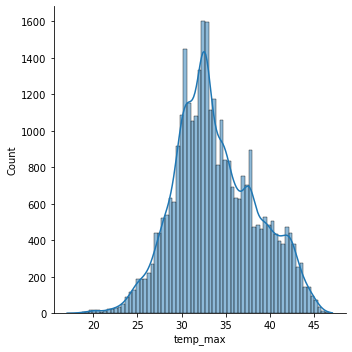

In [98]:
import seaborn as sns
max_temp = df_adil["temp_max"]
sns.displot(max_temp, kde=True)


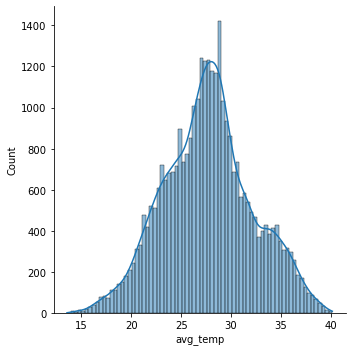

In [13]:
avg_temp = df_adil["avg_temp"]
sns.displot(avg_temp, kde=True)

In [140]:
# df_adil["temp_max"].plot(figsize=(18,6))

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [99]:
from statsmodels.tsa.stattools import adfuller

def aug_df_test(data):
     dftest = adfuller(data, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
aug_df_test(df_adil['temp_max'])

1. ADF :  -17.20640592942808
2. P-Value :  6.41048407245803e-30
3. Num Of Lags :  52
4. Num Of Observations Used For ADF Regression: 32685
5. Critical Values :
	 1% :  -3.4305500860836244
	 5% :  -2.861628432907359
	 10% :  -2.566817070091527


In [16]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df_adil['temp_max'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic


KeyboardInterrupt: 

In [144]:
stepwise_fit = auto_arima(df_adil['avg_temp'], trace=True, suppress_warnings=True, n_jobs = -1)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=177121.143, Time=13.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=186859.215, Time=0.48 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=185025.515, Time=1.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=183363.027, Time=2.95 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=186857.215, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=177242.549, Time=7.58 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=18.79 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=177075.151, Time=16.90 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=176459.440, Time=12.35 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=183472.206, Time=1.71 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=175888.536, Time=13.89 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=182354.913, Time=2.24 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=175536.400, Time=15.89 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=182021.379, Time=2.60 sec
 ARIMA

In [11]:
from sklearn.model_selection import train_test_split

train_adil, test_adil = train_test_split(df_adil, test_size=0.3)


In [100]:
import statsmodels.api as sm


In [101]:
# from statsmodels.tsa.arima_model import ARIMA

model = sm.tsa.arima.ARIMA(df_adil["temp_max"], order=(5,1,4))
result = model.fit() 
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:               temp_max   No. Observations:                32738
Model:                 ARIMA(5, 1, 4)   Log Likelihood              -88441.791
Date:                Fri, 03 Mar 2023   AIC                         176903.582
Time:                        11:12:19   BIC                         176987.545
Sample:                             0   HQIC                        176930.411
                              - 32738                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6744      0.012    -54.412      0.000      -0.699      -0.650
ar.L2          0.7982      0.014     57.294      0.000       0.771       0.825
ar.L3          0.2779      0.009     30.956      0.0

In [102]:
model_avg = sm.tsa.arima.ARIMA(df_adil["avg_temp"], order=(5,1,1))
result_avg = model_avg.fit() 
print(result_avg.summary())

                               SARIMAX Results                                
Dep. Variable:               avg_temp   No. Observations:                32738
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -87760.200
Date:                Fri, 03 Mar 2023   AIC                         175534.400
Time:                        11:12:36   BIC                         175593.174
Sample:                             0   HQIC                        175553.180
                              - 32738                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3795      0.006     61.877      0.000       0.367       0.392
ar.L2         -0.0351      0.006     -5.998      0.000      -0.047      -0.024
ar.L3         -0.1063      0.006    -18.484      0.0

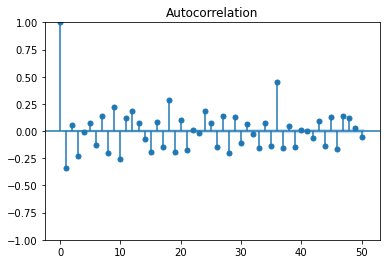

In [20]:
transformed_df = df_adil["temp_max"].diff().dropna()
sm.graphics.tsa.plot_acf(transformed_df, lags=50)
plt.show()



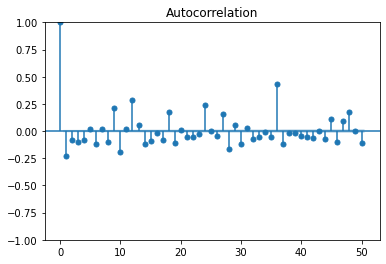

In [21]:
transformed_df = df_adil["avg_temp"].diff().dropna()
sm.graphics.tsa.plot_acf(transformed_df, lags=50)
plt.show()

In [103]:
# start = len(train_adil)
# end = len(train_adil)+len(test_adil)-1
# pred = model.predict(train_adil,result).rename('ARIMA Predictions')
# pred.plot(legend=True)
# test_adil['temp_max (⁰C)'].plot(legend=True)


df_adil["max_temp_pred"] = list(result.predict(1,len(df_adil)))
df_adil["avg_temp_pred"] = list(result_avg.predict(1,len(df_adil)))



In [104]:
df_adil.tail()

,district,mandal,odate,rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,avg_temp,max_temp_pred,avg_temp_pred
1034212,Adilabad,Utnur,31-Aug-22,0.0,25.6,32.5,67.1,99.9,0.0,11.5,29.05,32.353115,27.756628
1034213,Adilabad,Utnur,31-Jan-22,0.0,9.0,30.4,24.2,92.4,0.0,65.1,19.70,34.203516,23.779690
1034214,Adilabad,Utnur,31-Jul-22,6.8,22.4,31.3,75.6,100.0,0.0,5.0,26.85,32.256330,27.129366
1034215,Adilabad,Utnur,31-Mar-22,0.0,18.9,40.7,15.4,35.8,0.0,1.0,29.80,39.462641,29.803343
1034216,Adilabad,Utnur,31-May-22,0.0,30.2,39.6,29.8,52.8,0.0,2.1,34.90,36.261329,32.065558


In [105]:
qual_metrics(df_adil["max_temp_pred"],df_adil["temp_max"])


MAE:  2.340067572637749
RMSE:  3.074758607332412


In [106]:
qual_metrics(df_adil["avg_temp_pred"],df_adil["avg_temp"])

MAE:  1.802345251117101
RMSE:  2.2720127169773794


In [107]:
df_adil.head()

,district,mandal,odate,rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,avg_temp,max_temp_pred,avg_temp_pred
0,Adilabad,Adilabad (Urban),01-01-2018,0.0,10.4,29.7,41.8,83.8,0.0,5.7,20.05,29.699772,20.049917
1,Adilabad,Adilabad (Urban),01-01-2018,0.0,12.1,30.5,24.7,82.2,NaN,NaN,21.30,30.225941,21.008106
2,Adilabad,Adilabad (Urban),01-02-2018,0.0,11.2,34.8,29.8,74.6,0.0,4.8,23.00,33.168552,22.368108
3,Adilabad,Adilabad (Urban),01-02-2018,0.0,13.0,35.7,12.9,61.5,NaN,NaN,24.35,34.499083,23.437746
4,Adilabad,Adilabad (Urban),01-03-2018,0.0,17.3,38.0,31.8,71.5,0.0,3.4,27.65,35.235990,25.699251


# NIZAMABAD


In [108]:
df_nizam = df.loc[df["district"] == "Nizamabad"]
df_nizam.shape

(56309, 11)

In [109]:
df_nizam.head()

,district,mandal,odate,rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,avg_temp
192886,Nizamabad,Armur,01-01-2018,0.0,13.3,28.8,30.4,77.2,0.0,11.9,21.05
192887,Nizamabad,Armur,01-01-2018,0.0,13.0,28.5,32.1,78.9,0.0,5.8,20.75
192888,Nizamabad,Armur,01-01-2018,0.0,13.6,30.2,25.0,98.3,0.0,11.4,21.90
192889,Nizamabad,Armur,01-01-2018,0.0,13.3,29.9,26.7,100.0,0.0,3.4,21.60
192890,Nizamabad,Armur,01-02-2018,0.0,12.3,32.5,17.4,69.5,0.0,13.7,22.40


In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [29]:
def aug_df_test(data):
     dftest = adfuller(data, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
aug_df_test(df_nizam['temp_max'])

1. ADF :  -20.7095181542184
2. P-Value :  0.0
3. Num Of Lags :  59
4. Num Of Observations Used For ADF Regression: 56249
5. Critical Values :
	 1% :  -3.4304662615948405
	 5% :  -2.8615913853630306
	 10% :  -2.5667973507073665


In [110]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df_nizam['temp_max'], trace=True, suppress_warnings=True,n_jobs=-1)

Performing stepwise search to minimize aic


KeyboardInterrupt: 

In [168]:
stepwise_fit = auto_arima(df_nizam['avg_temp'], trace=True, suppress_warnings=True,n_jobs=-1)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=287335.520, Time=26.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=302924.456, Time=0.83 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=298912.709, Time=1.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=297212.702, Time=3.94 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=302922.456, Time=0.49 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=287335.044, Time=14.88 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=289698.654, Time=8.54 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=287336.355, Time=12.87 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=286783.965, Time=17.71 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=286875.552, Time=11.35 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=285185.035, Time=51.23 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=286077.973, Time=62.16 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=285565.102, Time=80.05 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=286509.824, Time=29.80 

In [111]:
model = sm.tsa.arima.ARIMA(df_nizam["temp_max"], order=(5,1,5))
result = model.fit() 
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:               temp_max   No. Observations:                56309
Model:                 ARIMA(5, 1, 5)   Log Likelihood             -147800.655
Date:                Fri, 03 Mar 2023   AIC                         295623.309
Time:                        11:14:40   BIC                         295721.634
Sample:                             0   HQIC                        295653.940
                              - 56309                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5115      0.005    -95.075      0.000      -0.522      -0.501
ar.L2          0.2031      0.005     44.685      0.000       0.194       0.212
ar.L3         -0.8076      0.002   -440.279      0.0

In [112]:
model_nizam_avg = sm.tsa.arima.ARIMA(df_nizam["avg_temp"], order=(5,1,4))
result_nizam_avg = model_nizam_avg.fit() 
print(result_nizam_avg.summary())

                               SARIMAX Results                                
Dep. Variable:               avg_temp   No. Observations:                56309
Model:                 ARIMA(5, 1, 4)   Log Likelihood             -141169.244
Date:                Fri, 03 Mar 2023   AIC                         282358.489
Time:                        11:15:50   BIC                         282447.875
Sample:                             0   HQIC                        282386.335
                              - 56309                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6550      0.015    -42.692      0.000      -0.685      -0.625
ar.L2          0.9334      0.020     47.530      0.000       0.895       0.972
ar.L3          0.4205      0.006     72.082      0.0

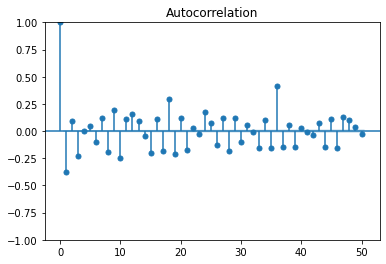

In [34]:
transformed_df = df_nizam["temp_max"].diff().dropna()
sm.graphics.tsa.plot_acf(transformed_df, lags=50)
plt.show()



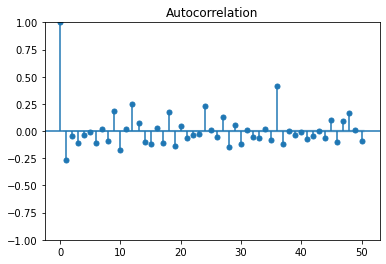

In [35]:
transformed_df = df_nizam["avg_temp"].diff().dropna()
sm.graphics.tsa.plot_acf(transformed_df, lags=50)
plt.show()



In [113]:
df_nizam["max_temp_pred"] = list(result.predict(1,len(df_nizam)))
df_nizam["avg_temp_pred"] = list(result_nizam_avg.predict(1,len(df_nizam)))

In [114]:
qual_metrics(df_nizam["max_temp_pred"],df_nizam["temp_max"])


MAE:  2.105561093539526
RMSE:  2.80373024549009


In [115]:
qual_metrics(df_adil["avg_temp_pred"],df_adil["avg_temp"])


MAE:  1.802345251117101
RMSE:  2.2720127169773794


In [116]:
df_nizam.head()


,district,mandal,odate,rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,avg_temp,max_temp_pred,avg_temp_pred
192886,Nizamabad,Armur,01-01-2018,0.0,13.3,28.8,30.4,77.2,0.0,11.9,21.05,28.799774,21.049936
192887,Nizamabad,Armur,01-01-2018,0.0,13.0,28.5,32.1,78.9,0.0,5.8,20.75,28.620350,20.823481
192888,Nizamabad,Armur,01-01-2018,0.0,13.6,30.2,25.0,98.3,0.0,11.4,21.90,29.484874,21.620341
192889,Nizamabad,Armur,01-01-2018,0.0,13.3,29.9,26.7,100.0,0.0,3.4,21.60,29.780433,21.548462
192890,Nizamabad,Armur,01-02-2018,0.0,12.3,32.5,17.4,69.5,0.0,13.7,22.40,30.668109,21.999905


# Khammam


In [117]:
df_khammam = df.loc[df["district"] == "Khammam"]
df_khammam.shape

(45927, 11)

In [118]:
df_khammam.head()

,district,mandal,odate,rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,avg_temp
78614,Khammam,Bonakal,01-01-2018,0.0,19.1,32.2,34.3,99.9,0.0,8.1,25.65
78615,Khammam,Bonakal,01-02-2018,0.0,14.2,33.6,18.2,94.6,0.0,8.0,23.90
78616,Khammam,Bonakal,01-03-2018,0.0,17.4,37.7,17.3,99.9,0.0,4.0,27.55
78617,Khammam,Bonakal,01-04-2018,0.0,23.9,37.7,40.6,99.9,0.0,7.1,30.80
78618,Khammam,Bonakal,01-05-2018,0.0,28.9,43.3,22.2,99.9,0.1,12.6,36.10


In [42]:

def aug_df_test(data):
     dftest = adfuller(data, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
aug_df_test(df_khammam['temp_max'])

1. ADF :  -17.262954926638347
2. P-Value :  5.925577474160993e-30
3. Num Of Lags :  56
4. Num Of Observations Used For ADF Regression: 45870
5. Critical Values :
	 1% :  -3.4304925695658377
	 5% :  -2.861603012695081
	 10% :  -2.5668035395953406


In [181]:
stepwise_fit = auto_arima(df_khammam['temp_max'], trace=True, suppress_warnings=True,n_jobs=-1)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=230751.323, Time=48.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=246842.981, Time=1.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=239754.787, Time=3.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=236914.666, Time=13.54 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=246840.981, Time=0.76 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=231197.703, Time=30.00 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=231021.304, Time=35.83 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=230218.342, Time=92.55 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=230444.493, Time=41.44 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=230103.142, Time=62.06 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=230395.160, Time=53.65 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=230080.455, Time=84.34 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=230383.551, Time=69.93 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=229625.156, Time=180.

In [182]:
stepwise_fit = auto_arima(df_khammam['avg_temp'], trace=True, suppress_warnings=True,n_jobs=-1)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=215765.854, Time=42.86 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=228174.021, Time=1.50 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=223882.978, Time=1.95 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=222201.123, Time=7.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=228172.021, Time=0.84 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=215696.496, Time=41.49 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=218246.846, Time=17.73 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=215789.466, Time=24.84 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=215517.663, Time=44.21 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=216245.446, Time=26.18 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=215607.301, Time=69.82 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=215235.331, Time=51.80 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=215311.011, Time=38.97 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=215095.183, Time=74.33

In [119]:
model = sm.tsa.arima.ARIMA(df_khammam["temp_max"], order=(4,1,4))
result = model.fit() 
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:               temp_max   No. Observations:                45927
Model:                 ARIMA(4, 1, 4)   Log Likelihood             -113877.865
Date:                Fri, 03 Mar 2023   AIC                         227773.731
Time:                        11:18:03   BIC                         227852.344
Sample:                             0   HQIC                        227798.454
                              - 45927                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4322      0.005    -81.473      0.000      -0.443      -0.422
ar.L2          1.1978      0.006    184.604      0.000       1.185       1.210
ar.L3          0.5015      0.005     93.811      0.0

In [120]:
model_khammam = sm.tsa.arima.ARIMA(df_khammam["avg_temp"], order=(3,1,3))
result_khammam = model_khammam.fit() 
print(result_khammam.summary())

                               SARIMAX Results                                
Dep. Variable:               avg_temp   No. Observations:                45927
Model:                 ARIMA(3, 1, 3)   Log Likelihood             -106922.936
Date:                Fri, 03 Mar 2023   AIC                         213859.872
Time:                        11:19:06   BIC                         213921.015
Sample:                             0   HQIC                        213879.101
                              - 45927                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4175      0.005    -83.123      0.000      -0.427      -0.408
ar.L2         -0.4531      0.005    -94.642      0.000      -0.463      -0.444
ar.L3          0.5118      0.004    118.036      0.0

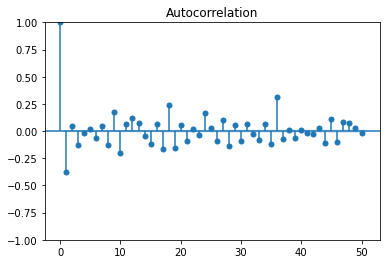

In [121]:
transformed_df = df_khammam["temp_max"].diff().dropna()
sm.graphics.tsa.plot_acf(transformed_df, lags=50)
plt.show()



In [122]:
df_khammam["max_temp_pred"] = list(result.predict(1,len(df_khammam)))
df_khammam["avg_temp_pred"] = list(result_khammam.predict(1,len(df_khammam)))

In [123]:
df_khammam.head()

,district,mandal,odate,rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,avg_temp,max_temp_pred,avg_temp_pred
78614,Khammam,Bonakal,01-01-2018,0.0,19.1,32.2,34.3,99.9,0.0,8.1,25.65,32.199856,25.649935
78615,Khammam,Bonakal,01-02-2018,0.0,14.2,33.6,18.2,94.6,0.0,8.0,23.90,33.103053,24.425195
78616,Khammam,Bonakal,01-03-2018,0.0,17.4,37.7,17.3,99.9,0.0,4.0,27.55,35.880284,26.594277
78617,Khammam,Bonakal,01-04-2018,0.0,23.9,37.7,40.6,99.9,0.0,7.1,30.80,36.544614,28.814486
78618,Khammam,Bonakal,01-05-2018,0.0,28.9,43.3,22.2,99.9,0.1,12.6,36.10,39.382604,32.834518


In [124]:
qual_metrics(df_khammam["max_temp_pred"],df_khammam["temp_max"])

MAE:  1.57128100564724
RMSE:  2.0656523870042145


In [125]:
qual_metrics(df_khammam["avg_temp_pred"],df_khammam["avg_temp"])

MAE:  1.2037392666296283
RMSE:  1.5107598216699838


In [126]:
df_khammam.head()

,district,mandal,odate,rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,avg_temp,max_temp_pred,avg_temp_pred
78614,Khammam,Bonakal,01-01-2018,0.0,19.1,32.2,34.3,99.9,0.0,8.1,25.65,32.199856,25.649935
78615,Khammam,Bonakal,01-02-2018,0.0,14.2,33.6,18.2,94.6,0.0,8.0,23.90,33.103053,24.425195
78616,Khammam,Bonakal,01-03-2018,0.0,17.4,37.7,17.3,99.9,0.0,4.0,27.55,35.880284,26.594277
78617,Khammam,Bonakal,01-04-2018,0.0,23.9,37.7,40.6,99.9,0.0,7.1,30.80,36.544614,28.814486
78618,Khammam,Bonakal,01-05-2018,0.0,28.9,43.3,22.2,99.9,0.1,12.6,36.10,39.382604,32.834518


# Karimnagar

In [127]:
df_karim = df.loc[df["district"] == "Karimnagar"]
df_karim.shape

(33028, 11)

In [52]:
df_karim.head()

,district,mandal,odate,rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,avg_temp
69391,Karimnagar,Chigurumamidi,01-01-2018,0.0,14.7,31.9,31.1,87.1,0.0,5.2,23.30
69392,Karimnagar,Chigurumamidi,01-01-2018,0.0,15.0,32.2,29.4,85.4,0.0,8.3,23.60
69393,Karimnagar,Chigurumamidi,01-02-2018,0.0,13.0,32.9,17.1,71.7,0.0,10.3,22.95
69394,Karimnagar,Chigurumamidi,01-02-2018,0.0,13.2,33.2,14.4,69.0,0.0,10.3,23.20
69395,Karimnagar,Chigurumamidi,01-03-2018,0.0,17.2,37.6,15.4,62.8,0.0,10.5,27.40


In [197]:
stepwise_fit = auto_arima(df_karim['temp_max'], trace=True, suppress_warnings=True,n_jobs=-1)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=175425.363, Time=30.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=187179.012, Time=1.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=182121.345, Time=2.45 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=180121.156, Time=8.92 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=187177.012, Time=0.72 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=175897.163, Time=26.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=175764.132, Time=26.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=174429.844, Time=73.74 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=174794.070, Time=30.19 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=174192.409, Time=47.09 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=174728.752, Time=38.78 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=174122.071, Time=72.92 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=174717.601, Time=47.08 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=102.34 sec
 

In [198]:
stepwise_fit = auto_arima(df_karim['avg_temp'], trace=True, suppress_warnings=True,n_jobs=-1)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=166822.797, Time=21.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=181682.965, Time=0.99 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=167112.633, Time=2.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=171743.327, Time=7.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=315076.982, Time=0.61 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=166818.017, Time=35.91 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=168758.608, Time=11.13 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=166841.358, Time=27.37 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=166800.561, Time=46.52 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=167353.657, Time=15.07 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=166808.400, Time=46.46 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=165897.126, Time=81.84 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=167109.636, Time=20.70 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=165982.114, Time=89.05

In [128]:
model = sm.tsa.arima.ARIMA(df_karim["temp_max"], order=(5,1,4))
result = model.fit() 
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:               temp_max   No. Observations:                33028
Model:                 ARIMA(5, 1, 4)   Log Likelihood              -85828.881
Date:                Fri, 03 Mar 2023   AIC                         171677.763
Time:                        11:21:03   BIC                         171761.814
Sample:                             0   HQIC                        171704.609
                              - 33028                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4986      0.010    -51.489      0.000      -0.518      -0.480
ar.L2          1.1285      0.011    107.466      0.000       1.108       1.149
ar.L3          0.4760      0.009     51.343      0.0

In [129]:
model_karim = sm.tsa.arima.ARIMA(df_karim["avg_temp"], order=(3,0,5))
result_karim= model_karim.fit() 
print(result_karim.summary())

                               SARIMAX Results                                
Dep. Variable:               avg_temp   No. Observations:                33028
Model:                 ARIMA(3, 0, 5)   Log Likelihood              -82280.155
Date:                Fri, 03 Mar 2023   AIC                         164580.311
Time:                        11:22:57   BIC                         164664.362
Sample:                             0   HQIC                        164607.157
                              - 33028                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.2806      0.581     48.677      0.000      27.142      29.419
ar.L1          0.3935      0.011     36.490      0.000       0.372       0.415
ar.L2         -0.2002      0.011    -18.818      0.0

In [130]:
df_karim["max_temp_pred"] = list(result.predict(1,len(df_karim)))
df_karim["avg_temp_pred"] = list(result_karim.predict(1,len(df_karim)))

In [131]:
df_karim.head()

,district,mandal,odate,rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,avg_temp,max_temp_pred,avg_temp_pred
69391,Karimnagar,Chigurumamidi,01-01-2018,0.0,14.7,31.9,31.1,87.1,0.0,5.2,23.30,31.899797,24.597894
69392,Karimnagar,Chigurumamidi,01-01-2018,0.0,15.0,32.2,29.4,85.4,0.0,8.3,23.60,32.087311,24.589924
69393,Karimnagar,Chigurumamidi,01-02-2018,0.0,13.0,32.9,17.1,71.7,0.0,10.3,22.95,32.583784,24.144673
69394,Karimnagar,Chigurumamidi,01-02-2018,0.0,13.2,33.2,14.4,69.0,0.0,10.3,23.20,32.894826,24.106712
69395,Karimnagar,Chigurumamidi,01-03-2018,0.0,17.2,37.6,15.4,62.8,0.0,10.5,27.40,35.270882,26.430633


In [132]:
qual_metrics(df_karim["max_temp_pred"],df_karim["temp_max"])

MAE:  1.8773610059838401
RMSE:  2.5181678252223767


In [133]:
qual_metrics(df_karim["avg_temp_pred"],df_karim["avg_temp"])

MAE:  1.4106848699832706
RMSE:  1.7900325183492007


# Warangal


In [134]:
df_war = df.loc[df["district"] == "Warangal"]
df_war.shape

(4745, 11)

In [135]:
df_war.head()

,district,mandal,odate,rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,avg_temp
1013827,Warangal,Chennaraopeta,01-Dec-21,0.0,17.5,31.4,59.4,95.3,0.0,0.9,24.45
1013828,Warangal,Chennaraopeta,01-Nov-21,0.0,20.8,32.8,65.6,93.8,0.0,0.0,26.80
1013829,Warangal,Chennaraopeta,01-Oct-21,0.0,25.0,33.3,67.8,98.1,0.0,1.0,29.15
1013830,Warangal,Chennaraopeta,02-Dec-21,0.0,18.2,30.6,58.0,93.9,0.0,1.1,24.40
1013831,Warangal,Chennaraopeta,02-Nov-21,0.0,22.2,30.3,64.5,97.4,0.0,0.0,26.25


In [211]:
stepwise_fit = auto_arima(df_war['temp_max'], trace=True, suppress_warnings=True,n_jobs=-1)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=25842.839, Time=4.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=29784.700, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=27596.493, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26096.749, Time=1.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=29782.700, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=25980.173, Time=3.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=25980.975, Time=5.65 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=25231.876, Time=5.52 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=25760.564, Time=2.57 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=25025.941, Time=7.38 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=25548.194, Time=2.92 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=25026.896, Time=7.45 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=24666.264, Time=5.85 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=25341.224, Time=7.78 sec
 ARIMA(5,1,3)(0,0,0

In [218]:
stepwise_fit = auto_arima(df_war['avg_temp'], trace=True, suppress_warnings=True,n_jobs=-1)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.91 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=28027.036, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26924.175, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.58 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=28025.037, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=26693.797, Time=0.61 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=26674.948, Time=0.67 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=26492.148, Time=1.10 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=25997.659, Time=1.48 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=24107.062, Time=3.81 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=24575.991, Time=4.49 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=23302.699, Time=8.24 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=11.47 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=23424.813, Time=7.99 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   

In [136]:
model = sm.tsa.arima.ARIMA(df_war["temp_max"], order=(3,1,3))
result = model.fit() 
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:               temp_max   No. Observations:                 4745
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -12270.890
Date:                Fri, 03 Mar 2023   AIC                          24555.780
Time:                        11:25:32   BIC                          24601.033
Sample:                             0   HQIC                         24571.683
                               - 4745                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1262      0.018     63.314      0.000       1.091       1.161
ar.L2         -0.3731      0.025    -14.765      0.000      -0.423      -0.324
ar.L3         -0.3718      0.017    -22.412      0.0

In [137]:
model_war = sm.tsa.arima.ARIMA(df_war["avg_temp"], order=(5,1,2))
result_war = model_war.fit() 
print(result_war.summary())

                               SARIMAX Results                                
Dep. Variable:               avg_temp   No. Observations:                 4745
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -11642.363
Date:                Fri, 03 Mar 2023   AIC                          23300.726
Time:                        11:25:41   BIC                          23352.443
Sample:                             0   HQIC                         23318.900
                               - 4745                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3997      0.018     22.383      0.000       0.365       0.435
ar.L2         -0.1144      0.016     -6.982      0.000      -0.146      -0.082
ar.L3         -0.1634      0.015    -11.209      0.0

In [138]:
df_war["max_temp_pred"] = list(result.predict(1,len(df_war)))
df_war["avg_temp_pred"] = list(result_war.predict(1,len(df_war)))

In [139]:
df_war.head()

,district,mandal,odate,rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,avg_temp,max_temp_pred,avg_temp_pred
1013827,Warangal,Chennaraopeta,01-Dec-21,0.0,17.5,31.4,59.4,95.3,0.0,0.9,24.45,31.399405,24.449760
1013828,Warangal,Chennaraopeta,01-Nov-21,0.0,20.8,32.8,65.6,93.8,0.0,0.0,26.80,31.948770,25.727277
1013829,Warangal,Chennaraopeta,01-Oct-21,0.0,25.0,33.3,67.8,98.1,0.0,1.0,29.15,32.645046,27.325934
1013830,Warangal,Chennaraopeta,02-Dec-21,0.0,18.2,30.6,58.0,93.9,0.0,1.1,24.40,32.319621,26.353009
1013831,Warangal,Chennaraopeta,02-Nov-21,0.0,22.2,30.3,64.5,97.4,0.0,0.0,26.25,31.098913,25.900604


In [140]:
qual_metrics(df_war["max_temp_pred"],df_war["temp_max"])

MAE:  3.706319420112021
RMSE:  4.567454138387236


In [141]:
qual_metrics(df_war["avg_temp_pred"],df_war["avg_temp"])

MAE:  3.024022447242446
RMSE:  3.6888188900027234


# Merging all the dataframes

In [142]:
df_new = pd.concat([df_adil, df_nizam], ignore_index=True)
df_new.shape


(89047, 13)

In [143]:
df_new.head()

,district,mandal,odate,rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,avg_temp,max_temp_pred,avg_temp_pred
0,Adilabad,Adilabad (Urban),01-01-2018,0.0,10.4,29.7,41.8,83.8,0.0,5.7,20.05,29.699772,20.049917
1,Adilabad,Adilabad (Urban),01-01-2018,0.0,12.1,30.5,24.7,82.2,NaN,NaN,21.30,30.225941,21.008106
2,Adilabad,Adilabad (Urban),01-02-2018,0.0,11.2,34.8,29.8,74.6,0.0,4.8,23.00,33.168552,22.368108
3,Adilabad,Adilabad (Urban),01-02-2018,0.0,13.0,35.7,12.9,61.5,NaN,NaN,24.35,34.499083,23.437746
4,Adilabad,Adilabad (Urban),01-03-2018,0.0,17.3,38.0,31.8,71.5,0.0,3.4,27.65,35.235990,25.699251


In [144]:
df_new.tail()

,district,mandal,odate,rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,avg_temp,max_temp_pred,avg_temp_pred
89042,Nizamabad,Yergatla,31-Aug-22,0.0,25.0,33.0,64.5,100.0,0.0,4.7,29.00,31.959953,29.269860
89043,Nizamabad,Yergatla,31-Jan-22,0.0,12.9,29.7,19.6,100.0,0.0,2.4,21.30,34.444780,24.522229
89044,Nizamabad,Yergatla,31-Jul-22,0.0,24.5,33.4,66.9,95.8,0.0,3.2,28.95,32.887982,28.649181
89045,Nizamabad,Yergatla,31-Mar-22,0.0,22.7,39.3,11.0,55.7,0.0,2.2,31.00,39.064068,31.124615
89046,Nizamabad,Yergatla,31-May-22,0.0,30.4,40.3,30.2,59.7,0.0,6.4,35.35,36.232854,31.719700


In [145]:
df_kham = pd.concat([df_new,df_khammam],ignore_index = True)
df_kham.head()

,district,mandal,odate,rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,avg_temp,max_temp_pred,avg_temp_pred
0,Adilabad,Adilabad (Urban),01-01-2018,0.0,10.4,29.7,41.8,83.8,0.0,5.7,20.05,29.699772,20.049917
1,Adilabad,Adilabad (Urban),01-01-2018,0.0,12.1,30.5,24.7,82.2,NaN,NaN,21.30,30.225941,21.008106
2,Adilabad,Adilabad (Urban),01-02-2018,0.0,11.2,34.8,29.8,74.6,0.0,4.8,23.00,33.168552,22.368108
3,Adilabad,Adilabad (Urban),01-02-2018,0.0,13.0,35.7,12.9,61.5,NaN,NaN,24.35,34.499083,23.437746
4,Adilabad,Adilabad (Urban),01-03-2018,0.0,17.3,38.0,31.8,71.5,0.0,3.4,27.65,35.235990,25.699251


In [146]:
df_kham.tail()

,district,mandal,odate,rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,avg_temp,max_temp_pred,avg_temp_pred
134969,Khammam,Yerrupalem,31-Aug-22,0.0,25.7,32.8,56.5,87.9,0.0,11.9,29.25,32.842322,29.298593
134970,Khammam,Yerrupalem,31-Jan-22,0.0,15.1,31.2,34.7,87.6,0.0,11.9,23.15,35.250450,26.167729
134971,Khammam,Yerrupalem,31-Jul-22,0.0,26.7,35.7,56.7,86.5,0.0,0.8,31.20,33.713980,30.567943
134972,Khammam,Yerrupalem,31-Mar-22,0.0,27.2,39.6,44.5,91.9,0.0,13.3,33.40,39.239334,31.365290
134973,Khammam,Yerrupalem,31-May-22,0.0,31.4,39.3,44.4,66.6,0.0,18.8,35.35,36.084428,32.982509


In [147]:
df_kar = pd.concat([df_kham,df_karim],ignore_index = True)
df_kar.shape

(168002, 13)

In [148]:
df_all = pd.concat([df_kar,df_war],ignore_index = True)
df_all.head()

,district,mandal,odate,rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,avg_temp,max_temp_pred,avg_temp_pred
0,Adilabad,Adilabad (Urban),01-01-2018,0.0,10.4,29.7,41.8,83.8,0.0,5.7,20.05,29.699772,20.049917
1,Adilabad,Adilabad (Urban),01-01-2018,0.0,12.1,30.5,24.7,82.2,NaN,NaN,21.30,30.225941,21.008106
2,Adilabad,Adilabad (Urban),01-02-2018,0.0,11.2,34.8,29.8,74.6,0.0,4.8,23.00,33.168552,22.368108
3,Adilabad,Adilabad (Urban),01-02-2018,0.0,13.0,35.7,12.9,61.5,NaN,NaN,24.35,34.499083,23.437746
4,Adilabad,Adilabad (Urban),01-03-2018,0.0,17.3,38.0,31.8,71.5,0.0,3.4,27.65,35.235990,25.699251


# Dataframe containing the max and avg temp of 5 districts

In [149]:
df_all.shape

(172747, 13)

In [150]:
df_all.head()

,district,mandal,odate,rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,avg_temp,max_temp_pred,avg_temp_pred
0,Adilabad,Adilabad (Urban),01-01-2018,0.0,10.4,29.7,41.8,83.8,0.0,5.7,20.05,29.699772,20.049917
1,Adilabad,Adilabad (Urban),01-01-2018,0.0,12.1,30.5,24.7,82.2,NaN,NaN,21.30,30.225941,21.008106
2,Adilabad,Adilabad (Urban),01-02-2018,0.0,11.2,34.8,29.8,74.6,0.0,4.8,23.00,33.168552,22.368108
3,Adilabad,Adilabad (Urban),01-02-2018,0.0,13.0,35.7,12.9,61.5,NaN,NaN,24.35,34.499083,23.437746
4,Adilabad,Adilabad (Urban),01-03-2018,0.0,17.3,38.0,31.8,71.5,0.0,3.4,27.65,35.235990,25.699251


In [151]:
df_all.tail()

,district,mandal,odate,rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,avg_temp,max_temp_pred,avg_temp_pred
172742,Warangal,Wardhannapet,31-Aug-22,0.0,25.7,33.4,56.4,100.0,0.0,2.7,29.55,35.091816,29.639348
172743,Warangal,Wardhannapet,31-Jan-22,0.0,13.4,31.0,25.7,89.3,0.0,4.2,22.20,35.098196,29.228483
172744,Warangal,Wardhannapet,31-Jul-22,0.0,25.3,32.3,59.5,97.0,0.0,7.2,28.80,34.672011,28.084801
172745,Warangal,Wardhannapet,31-Mar-22,0.0,25.3,38.2,40.6,100.0,0.0,4.8,31.75,33.548931,28.359349
172746,Warangal,Wardhannapet,31-May-22,0.0,30.3,41.5,21.9,47.5,0.0,9.1,35.90,33.195848,28.667919


In [152]:
qual_metrics(df_all["max_temp_pred"],df_all["temp_max"])

MAE:  2.0082974495045263
RMSE:  2.6970128800406235


In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt


def qual_metrics(pred_df, org_df):
    mae = mean_absolute_error(pred_df, org_df)
    rmse = sqrt(mean_squared_error(pred_df, org_df))
    print("MAE: ", mae)
    print("RMSE: ", rmse)

In [92]:
df_all['odate'] = pd.to_datetime(df["odate"].astype(str), format = '%d/%m/%Y',errors = "coerce").fillna(
    pd.to_datetime(df['odate'].astype(str), format = '%d/%b/%y', errors='coerce')).fillna(
    pd.to_datetime(df['odate'].astype(str), format = "%Y/%m/%d", errors='coerce')
)

In [86]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172747 entries, 0 to 172746
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   district        172747 non-null  object 
 1   mandal          172745 non-null  object 
 2   odate           30288 non-null   object 
 3   rainfall        172747 non-null  float64
 4   temp_min        172747 non-null  float64
 5   temp_max        172747 non-null  float64
 6   humidity_min    172739 non-null  float64
 7   humidity_max    172741 non-null  float64
 8   wind_speed_min  159993 non-null  float64
 9   wind_speed_max  165051 non-null  float64
 10  avg_temp        172747 non-null  float64
 11  max_temp_pred   172747 non-null  float64
 12  avg_temp_pred   172747 non-null  float64
dtypes: float64(10), object(3)
memory usage: 17.1+ MB


In [87]:
df_all.tail()

,district,mandal,odate,rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,avg_temp,max_temp_pred,avg_temp_pred
172742,Warangal,Wardhannapet,NaN,0.0,25.7,33.4,56.4,100.0,0.0,2.7,29.55,35.091816,29.639348
172743,Warangal,Wardhannapet,NaN,0.0,13.4,31.0,25.7,89.3,0.0,4.2,22.20,35.098196,29.228483
172744,Warangal,Wardhannapet,NaN,0.0,25.3,32.3,59.5,97.0,0.0,7.2,28.80,34.672011,28.084801
172745,Warangal,Wardhannapet,NaN,0.0,25.3,38.2,40.6,100.0,0.0,4.8,31.75,33.548931,28.359349
172746,Warangal,Wardhannapet,NaN,0.0,30.3,41.5,21.9,47.5,0.0,9.1,35.90,33.195848,28.667919


In [153]:
df_all.head()

,district,mandal,odate,rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,avg_temp,max_temp_pred,avg_temp_pred
0,Adilabad,Adilabad (Urban),01-01-2018,0.0,10.4,29.7,41.8,83.8,0.0,5.7,20.05,29.699772,20.049917
1,Adilabad,Adilabad (Urban),01-01-2018,0.0,12.1,30.5,24.7,82.2,NaN,NaN,21.30,30.225941,21.008106
2,Adilabad,Adilabad (Urban),01-02-2018,0.0,11.2,34.8,29.8,74.6,0.0,4.8,23.00,33.168552,22.368108
3,Adilabad,Adilabad (Urban),01-02-2018,0.0,13.0,35.7,12.9,61.5,NaN,NaN,24.35,34.499083,23.437746
4,Adilabad,Adilabad (Urban),01-03-2018,0.0,17.3,38.0,31.8,71.5,0.0,3.4,27.65,35.235990,25.699251


In [155]:
df_all["temp_range"] = (df_all["max_temp_pred"]-df_all["avg_temp_pred"])
df_all.head()

,district,mandal,odate,rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,avg_temp,max_temp_pred,avg_temp_pred,temp_range
0,Adilabad,Adilabad (Urban),01-01-2018,0.0,10.4,29.7,41.8,83.8,0.0,5.7,20.05,29.699772,20.049917,9.649854
1,Adilabad,Adilabad (Urban),01-01-2018,0.0,12.1,30.5,24.7,82.2,NaN,NaN,21.30,30.225941,21.008106,9.217835
2,Adilabad,Adilabad (Urban),01-02-2018,0.0,11.2,34.8,29.8,74.6,0.0,4.8,23.00,33.168552,22.368108,10.800445
3,Adilabad,Adilabad (Urban),01-02-2018,0.0,13.0,35.7,12.9,61.5,NaN,NaN,24.35,34.499083,23.437746,11.061337
4,Adilabad,Adilabad (Urban),01-03-2018,0.0,17.3,38.0,31.8,71.5,0.0,3.4,27.65,35.235990,25.699251,9.536739


In [164]:
for i in df_all["temp_range"]:
    if i > 4.5:

# if df_all["temp_range"] > 4.5: 
        df_all["heatwave_pred"] = True
    else:
        df_all["heatwave_pred"] = False



In [166]:
df_all.head()

,district,mandal,odate,rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,avg_temp,max_temp_pred,avg_temp_pred,temp_range,heatwave_pred
0,Adilabad,Adilabad (Urban),01-01-2018,0.0,10.4,29.7,41.8,83.8,0.0,5.7,20.05,29.699772,20.049917,9.649854,True
1,Adilabad,Adilabad (Urban),01-01-2018,0.0,12.1,30.5,24.7,82.2,NaN,NaN,21.30,30.225941,21.008106,9.217835,True
2,Adilabad,Adilabad (Urban),01-02-2018,0.0,11.2,34.8,29.8,74.6,0.0,4.8,23.00,33.168552,22.368108,10.800445,True
3,Adilabad,Adilabad (Urban),01-02-2018,0.0,13.0,35.7,12.9,61.5,NaN,NaN,24.35,34.499083,23.437746,11.061337,True
4,Adilabad,Adilabad (Urban),01-03-2018,0.0,17.3,38.0,31.8,71.5,0.0,3.4,27.65,35.235990,25.699251,9.536739,True
